<a href="https://colab.research.google.com/github/T-janhavi11/JPM/blob/master/foxmula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#loading the handwritten icons dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(len(X_train))
print(len(X_test))

11493376/11490434 [==============================] - 0s 0us/step
60000
10000


In [3]:
# if we consider 6th element from the dataset
print(X_train[5])

print("dimension for train set: ")
print(X_train[5].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

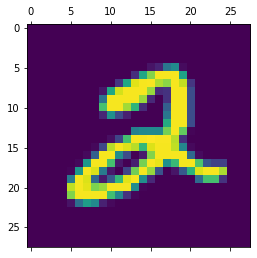

In [4]:
#picture the element
plt.matshow(X_train[5])

In [5]:
#checking the value
y_train[5]

2

In [6]:
X_train = X_train / 255
X_test = X_test / 255


#reshaping
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [7]:
#Defining and fiting model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4763 - accuracy: 0.8751
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9143
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2839 - accuracy: 0.9208
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9258
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2617 - accuracy: 0.9271
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2585 - accuracy: 0.9286
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2554 - accuracy: 0.9292
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2529 - accuracy: 0.9297
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [8]:
#evaluating our model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.9277


[0.26721033453941345, 0.9276999831199646]

In [9]:
y_predicted = model.predict(X_test_flattened)
y_predicted[5]

array([1.0168229e-05, 9.9912083e-01, 5.3337747e-01, 3.0448580e-01,
       2.8716028e-03, 2.0173550e-02, 4.4569969e-03, 7.4635625e-01,
       4.5999593e-01, 1.2201348e-01], dtype=float32)

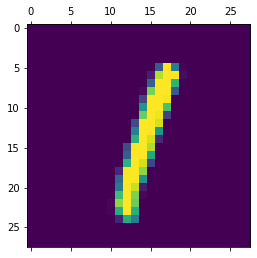

In [10]:
# testing on other 5th element in test set
plt.matshow(X_test[5])

In [12]:
np.argmax(y_predicted[5])

1

In [15]:
#checking the predicted values array
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [16]:
confm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(confm)

tf.Tensor(
[[ 957    0    2    2    0    5   10    3    1    0]
 [   0 1118    3    1    0    1    4    2    6    0]
 [   4    9  940   10    9    3   15   10   29    3]
 [   3    0   25  912    1   24    4   10   25    6]
 [   1    1    7    2  920    0   10    5   10   26]
 [  10    3    2   29    9  780   18    8   30    3]
 [   7    3    6    1    7    9  922    1    2    0]
 [   1    7   25    5    6    1    0  948    2   33]
 [   9   13    6   18    8   23   14   10  864    9]
 [  11    8    1    8   27    7    0   24    7  916]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

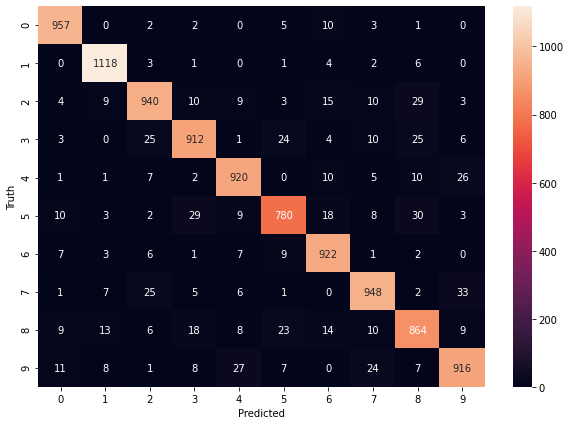

In [18]:
#showing the truth ratio using heatmap
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#completed